In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv(r"C:\Users\kle\OneDrive\Desktop\Salaries.csv")

C:\Users\kle\AppData\Local\Temp\ipykernel_11648\1410193335.py:1: DtypeWarning: Columns (0: BasePay, 1: OvertimePay, 2: OtherPay, 3: Unnamed: 9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\kle\OneDrive\Desktop\Salaries.csv")


In [3]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0.00,2014,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            148654 non-null  int64  
 1   EmployeeName  148654 non-null  str    
 2   JobTitle      148654 non-null  str    
 3   BasePay       148049 non-null  object 
 4   OvertimePay   148654 non-null  object 
 5   OtherPay      148654 non-null  object 
 6   TotalPay      148654 non-null  float64
 7   Year          148654 non-null  int64  
 8   Agency        148654 non-null  str    
 9   Unnamed: 9    38119 non-null   str    
dtypes: float64(1), int64(2), object(3), str(4)
memory usage: 11.3+ MB


In [5]:
df.shape

(148654, 10)

In [6]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'TotalPay', 'Year', 'Agency', 'Unnamed: 9'],
      dtype='str')

In [7]:
df.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco,NaN


In [8]:
df.tail(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
148649,148650,Roy I Tillery,Custodian,0,0,0,0.00,2014,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,0.00,2014,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0,0,-618.13,-618.13,2014,San Francisco,PT


In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Length: 148654, dtype: bool

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency,Unnamed: 9
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
148649,False,False,False,False,False,False,False,False,False,False
148650,False,False,False,False,False,False,False,False,False,True
148651,False,False,False,False,False,False,False,False,False,True
148652,False,False,False,False,False,False,False,False,False,True


In [12]:
df.isnull().sum()

Id                   0
EmployeeName         0
JobTitle             0
BasePay            605
OvertimePay          0
OtherPay             0
TotalPay             0
Year                 0
Agency               0
Unnamed: 9      110535
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dropna(subset=['BasePay'],inplace=True)

In [15]:
df = df.drop(columns=["Id", "EmployeeName", "Unnamed: 9"], errors="ignore")
df.head()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,326373.19,2011,San Francisco


In [16]:
df.isnull().sum()

JobTitle       0
BasePay        0
OvertimePay    0
OtherPay       0
TotalPay       0
Year           0
Agency         0
dtype: int64

In [17]:
# Replace missing numeric values with 0
df["BasePay"] = df["BasePay"].fillna(0)
df["OvertimePay"] = df["OvertimePay"].fillna(0)
df["OtherPay"] = df["OtherPay"].fillna(0)

df.isnull().sum()

JobTitle       0
BasePay        0
OvertimePay    0
OtherPay       0
TotalPay       0
Year           0
Agency         0
dtype: int64

In [18]:
le_job = LabelEncoder()
le_agency = LabelEncoder()

df["JobTitle"] = le_job.fit_transform(df["JobTitle"])
df["Agency"] = le_agency.fit_transform(df["Agency"])

df.head()

,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,Year,Agency
0,829,167411.18,0.0,400184.25,567595.43,2011,0
1,293,155966.02,245131.88,137811.38,538909.28,2011,0
2,293,212739.13,106088.18,16452.6,335279.91,2011,0
3,2121,77916.0,56120.71,198306.9,332343.61,2011,0
4,575,134401.6,9737.0,182234.59,326373.19,2011,0


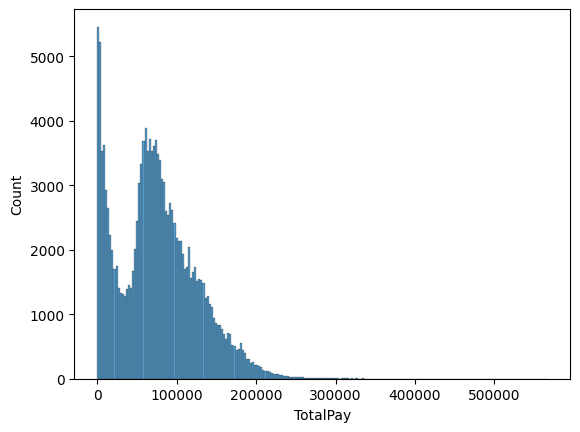

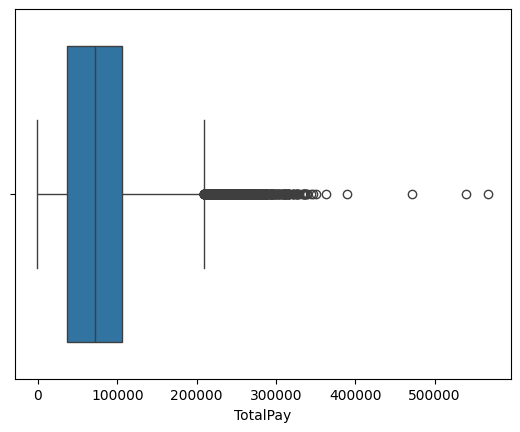

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df["TotalPay"] = pd.to_numeric(df["TotalPay"], errors="coerce")

sns.histplot(df["TotalPay"].dropna())
plt.show()

sns.boxplot(x=df["TotalPay"].dropna())
plt.show()

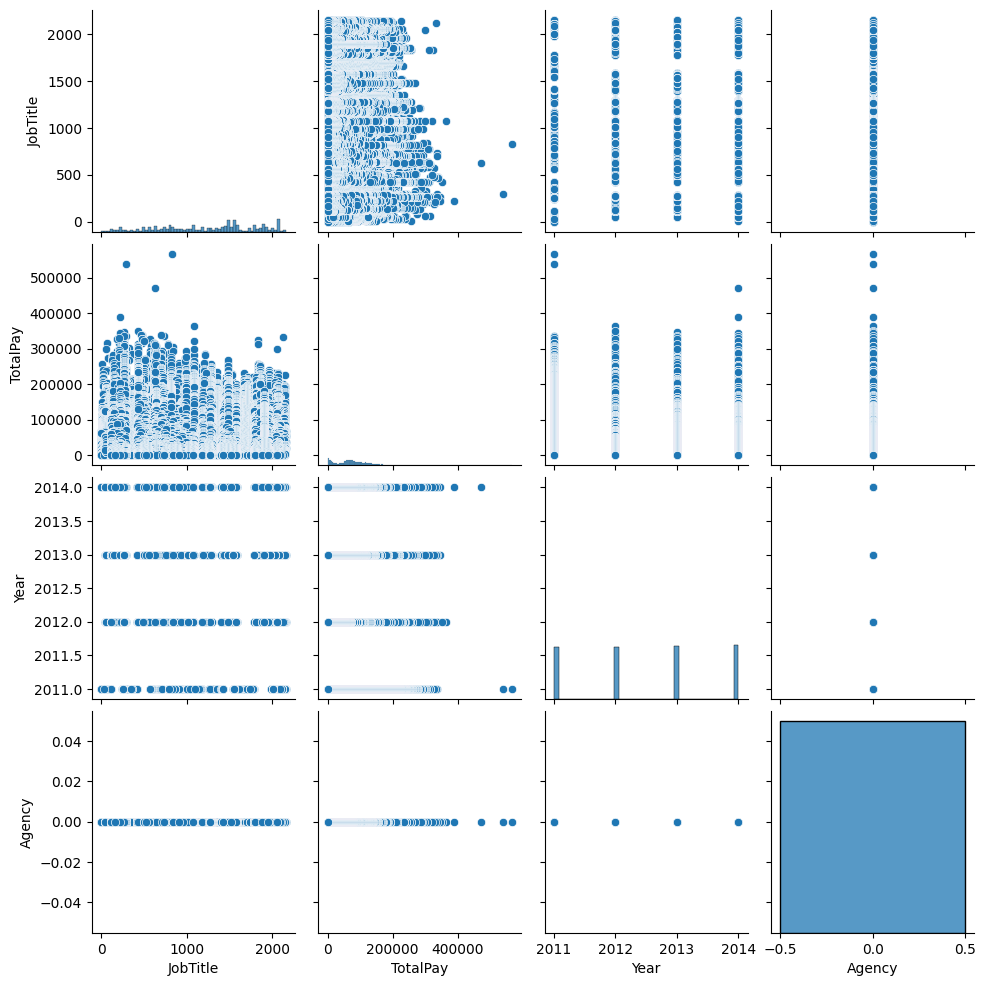

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [21]:
df['TotalPay'].value_counts()

TotalPay
 18594.00     82
 0.00         80
 123290.70    56
 132242.50    49
 105489.00    42
              ..
 13.77         1
 13.35         1
 12.89         1
 6.00          1
-618.13        1
Name: count, Length: 138188, dtype: int64

C:\Users\kle\AppData\Local\Temp\ipykernel_11648\1465107327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


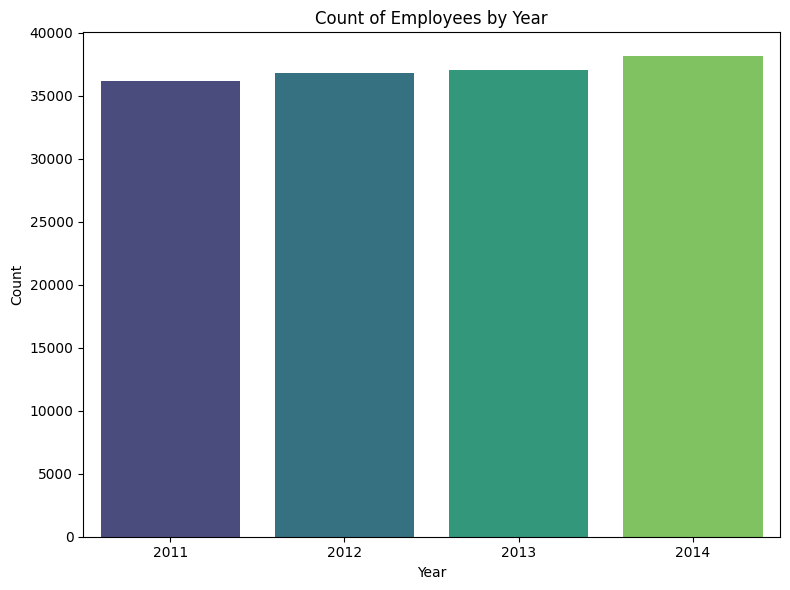

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Count of Employees by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

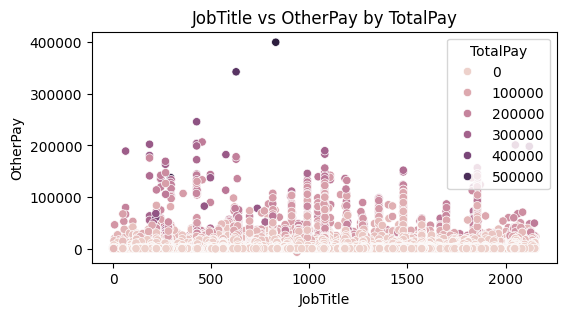

In [23]:
df['OtherPay'] = df['OtherPay'].replace('Not Provided', np.nan)
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors='coerce')
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='JobTitle', y='OtherPay', hue='TotalPay')
plt.title("JobTitle vs OtherPay by TotalPay")
plt.show()

In [24]:
cat = df.select_dtypes(include='object')
cat

,BasePay,OvertimePay
0,167411.18,0.0
1,155966.02,245131.88
2,212739.13,106088.18
3,77916.0,56120.71
4,134401.6,9737.0
...,...,...
148649,0,0
148650,Not Provided,Not Provided
148651,Not Provided,Not Provided
148652,Not Provided,Not Provided


In [25]:
#Select features and target
X = df[['BasePay', 'OvertimePay', 'OtherPay']]
y = df['TotalPay']

In [26]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]


In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [67]:
X_train = np.where(X_train == 'Not Provided', np.nan, X_train)
X_test  = np.where(X_test == 'Not Provided', np.nan, X_test)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)



In [68]:
y_pred = model.predict(X_test)

In [69]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

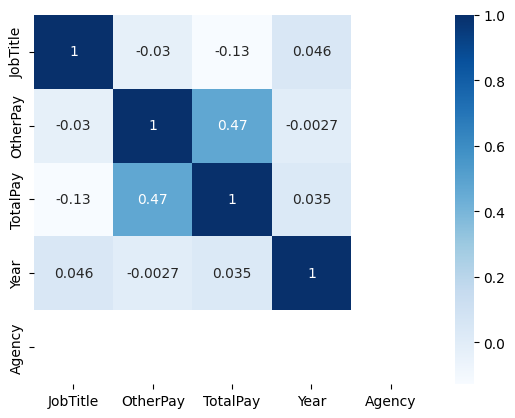

In [70]:
cr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(cr, annot=True, cmap='Blues')
plt.show()

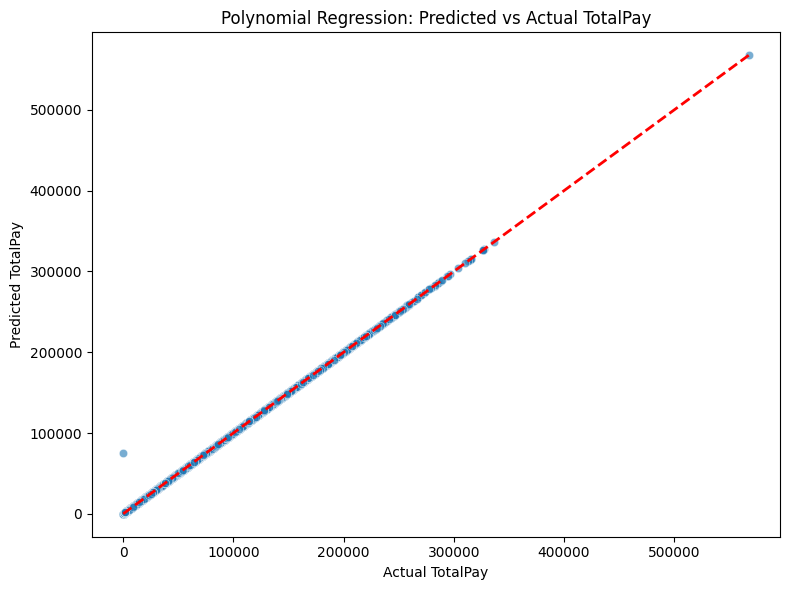

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title('Polynomial Regression: Predicted vs Actual TotalPay')
plt.xlabel('Actual TotalPay')
plt.ylabel('Predicted TotalPay')
plt.tight_layout()
plt.show()

In [72]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 2.5357560992917176
MSE: 190394.04681501177
RMSE: 436.34166293744147
R2 Score: 0.999925244143239


In [73]:
accuracy = r2_score(y_test, y_pred)
print("Model Accuracy (R² Score):", accuracy)
print("Model Accuracy (%):", accuracy * 100)

Model Accuracy (R² Score): 0.999925244143239
Model Accuracy (%): 99.9925244143239


In [74]:
sample = X.iloc[0:1]
model.predict(sample)

C:\Users\kle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([567595.43])

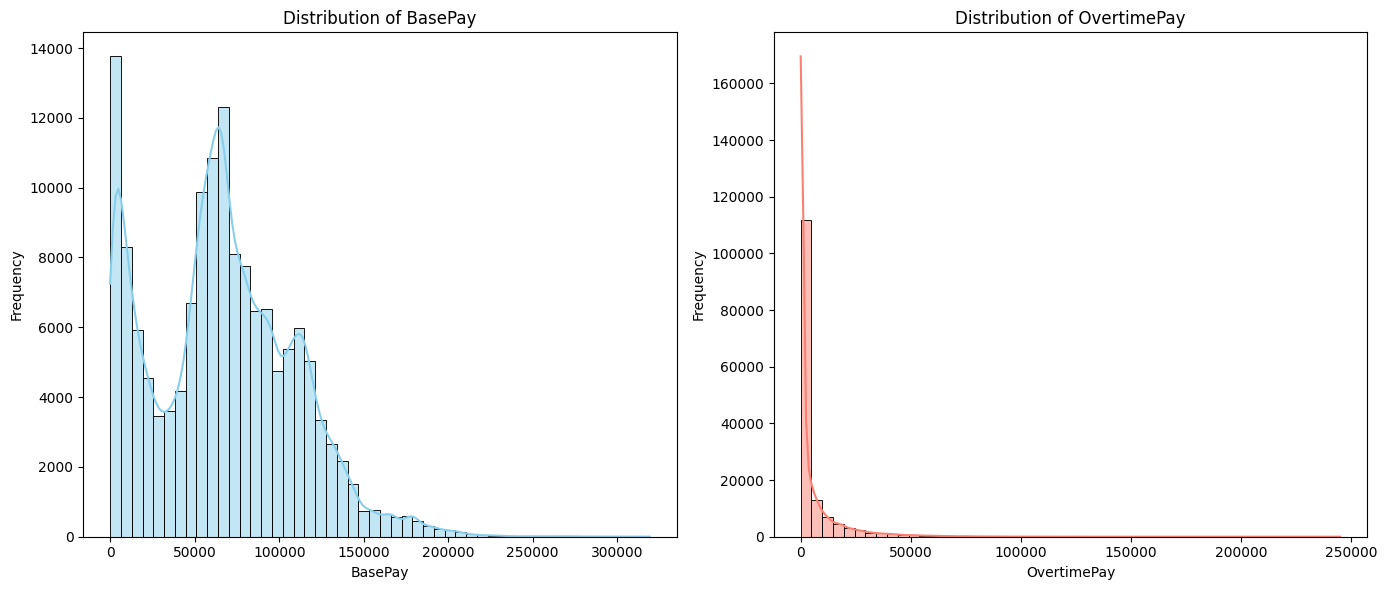

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))

# Histogram for BasePay
plt.subplot(1, 2, 1)
sns.histplot(df['BasePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='skyblue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')

# Histogram for OvertimePay
plt.subplot(1, 2, 2)
sns.histplot(df['OvertimePay'].apply(pd.to_numeric, errors='coerce'),bins=50, kde=True, color='salmon')
plt.title('Distribution of OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

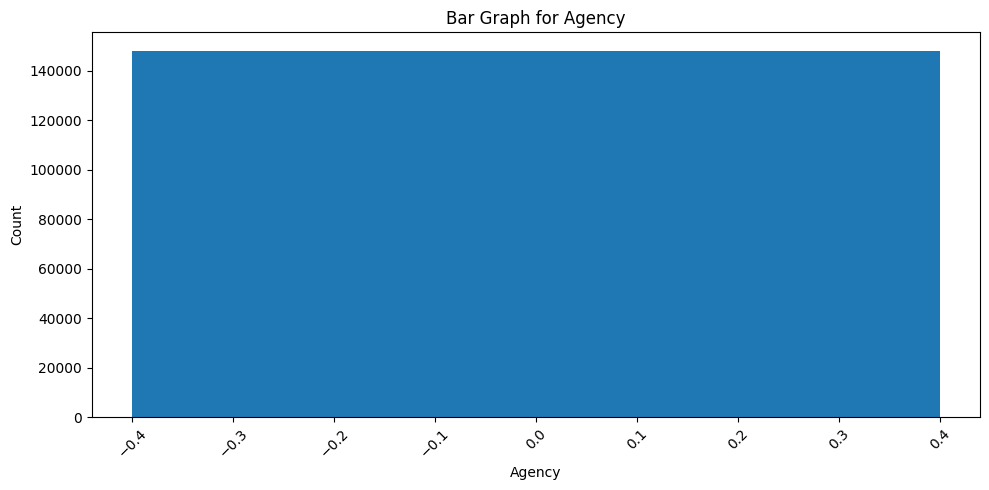

In [76]:
import matplotlib.pyplot as plt

agency_counts = df['Agency'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(agency_counts.index, agency_counts.values)
plt.xlabel('Agency')
plt.ylabel('Count')
plt.title('Bar Graph for Agency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kle\AppData\Local\Temp\ipykernel_11648\589457377.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_avg, x='Year', y='TotalPay', palette='viridis')


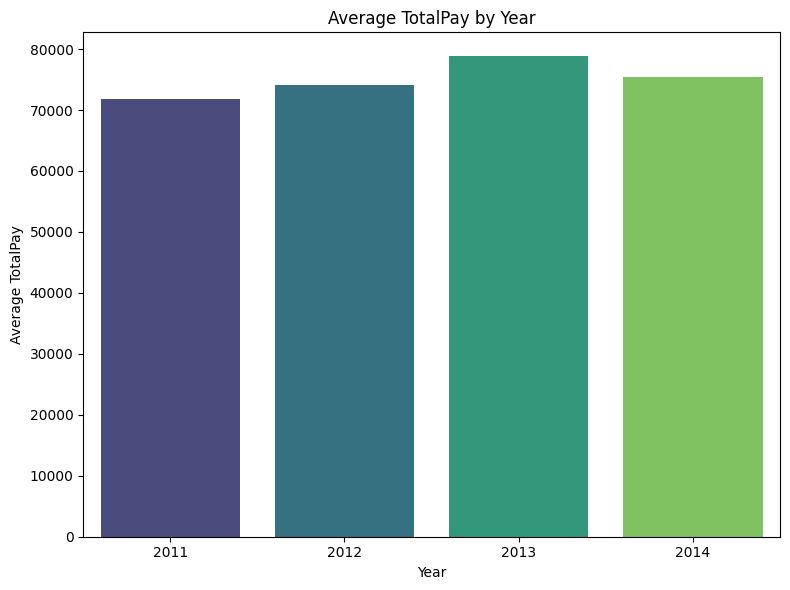

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average TotalPay per Year
year_avg = df.groupby('Year')['TotalPay'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=year_avg, x='Year', y='TotalPay', palette='viridis')
plt.title('Average TotalPay by Year')
plt.xlabel('Year')
plt.ylabel('Average TotalPay')
plt.tight_layout()
plt.show()

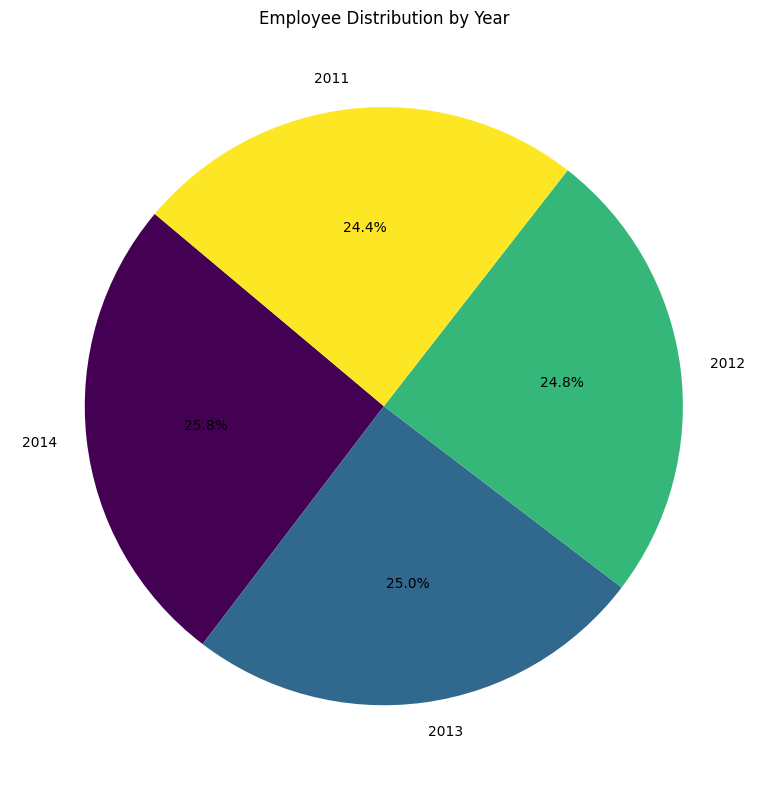

In [44]:
import matplotlib.pyplot as plt

# Count number of employees per Year
year_counts = df['Year'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(year_counts))))
plt.title('Employee Distribution by Year')
plt.tight_layout()
plt.show()

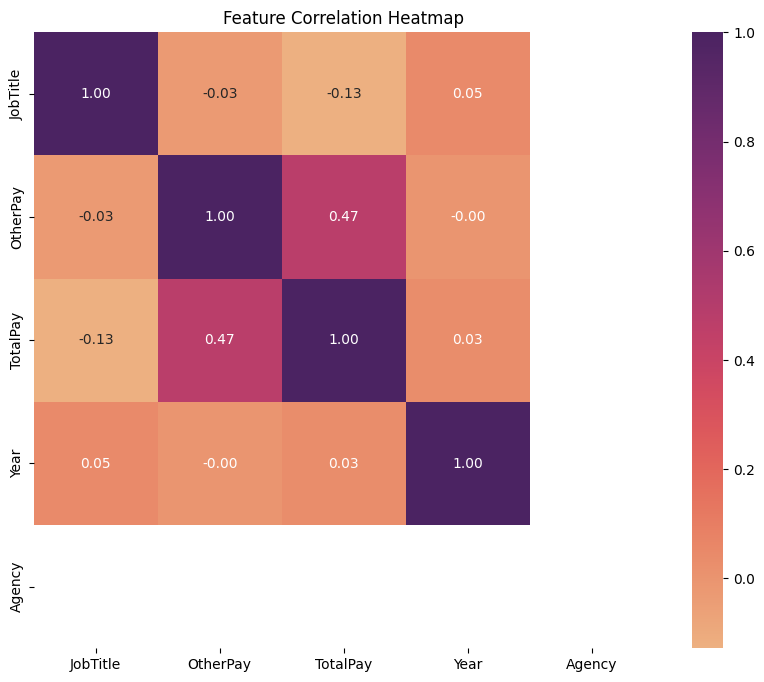

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [80]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [81]:
r2_score(y_test,y_pred)

0.999925244143239

In [82]:
y_pred1 = model.predict([[	212739.13	,106088.18	,16452.60	]])
y_pred1

array([335279.91])

***Conclusion***

-Salaries data was used for classification

-Employees were grouped into**Low,** **Medium,** **and High salary**

-Model gave **good accuracy**